Trying to extract haar features from the image. 

In [3]:

import sys
from time import time

import numpy as np
import matplotlib.pyplot as plt

from dask import delayed

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score

import skimage as sk
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
import skimage.io as io

In [4]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images) # this is the number of images 
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)] # if there is no titles available
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [5]:
@delayed
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)

Now lets apply this function on the image


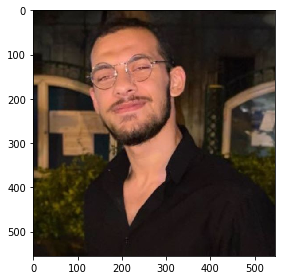

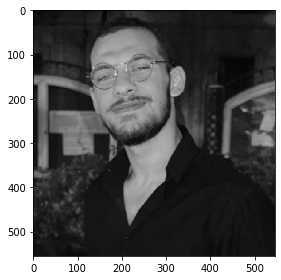

In [6]:
myImg = io.imread('Me.jpeg')
io.imshow(myImg)
io.show()

# converting the image into greyscale 
myImg = sk.color.rgb2gray(myImg)
io.imshow(myImg)
io.show()

In [1]:
feature_types = ['type-2-x', 'type-2-y']
# feature_coord, feature_type = sk.haar_like_feature_coord(width=myImg.shape[0], height=myImg.shape[1], feature_type=feature_types)
harFeatures = delayed(extract_feature_image(myImg, feature_types))
# harFeatures.visualize()
harFeatures = np.array(harFeatures.compute(scheduler='threading'))
# print(harFeatures)

NameError: name 'delayed' is not defined